<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/ml/Untitled100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

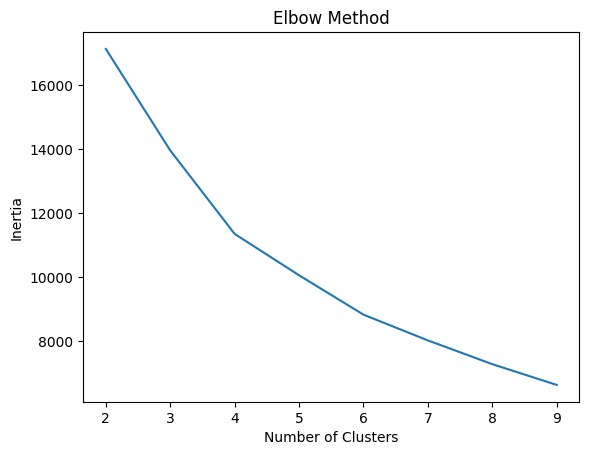

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Cluster 0:
 feat_PE                   20.375417
feat_PB                    2.551250
feat_Div_Yield             1.701667
feat_dist_from_ma_50      -0.123591
feat_dist_from_ma_200     -0.206564
feat_dist_from_max_50     -0.258469
feat_dist_from_min_50      0.174333
feat_dist_from_max_200    -0.278481
feat_dist_from_min_200     0.174333
feat_price_dist_20        -0.075743
feat_price_dist_50        -0.250242
dtype: float64
Cluster 1:
 feat_PE                   37.687541
feat_PB                    3.910820
feat_Div_Yield             1.153443
feat_dist_from_ma_50       0.054762
feat_dist_from_ma_200      0.211950
feat_dist_from_max_50     -0.017230
feat_dist_from_min_50      0.151009
feat_dist_from_max_200    -0.022520
feat_dist_from_min_200     0.683441
feat_price_dist_20         0.044984
feat_price_dist_50         0.117324
dtype: float64
Cluster 2:
 feat_PE                   22.142853
feat_PB                    3.405288
feat_Div_Yield             1.412435
feat_dist_from_ma_50      -0.03804

<ipython-input-40-5b31f1935804>:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your 10-year Nifty data (assuming a CSV format)
data_r = pd.read_csv('/content/data_fundamental.csv', index_col='Date', parse_dates=True)
data_r.reset_index(inplace=True)

# Feature engineering (optional)
for m in [50, 200]:
    data_r[f'feat_dist_from_ma_{m}'] = data_r['Close']/data_r['Close'].rolling(m).mean()-1

# Distance from n day max/min
for m in [50, 200]:
    data_r[f'feat_dist_from_max_{m}'] = data_r['Close']/data_r['High'].rolling(m).max()-1
    data_r[f'feat_dist_from_min_{m}'] = data_r['Close']/data_r['Low'].rolling(m).min()-1

# Price distance
for m in [20,50]:
    data_r[f'feat_price_dist_{m}'] = data_r['Close']/data_r['Close'].shift(m)-1

data=data_r[data_r['Date'] >= '2015-01-01']
# Select features and scale the data
features = [col for col in data_r.columns if 'feat' in col]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Determine the number of clusters (Elbow Method)
inertias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(2, 10), inertias)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose optimal_k based on the elbow plot

# Apply K-Means clustering
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(scaled_data)
data['Cluster'] = kmeans.labels_

# Analyze and interpret clusters
for i in range(6):
    cluster_data = data[data['Cluster'] == i]
    print(f"Cluster {i}:\n", cluster_data[features].mean())


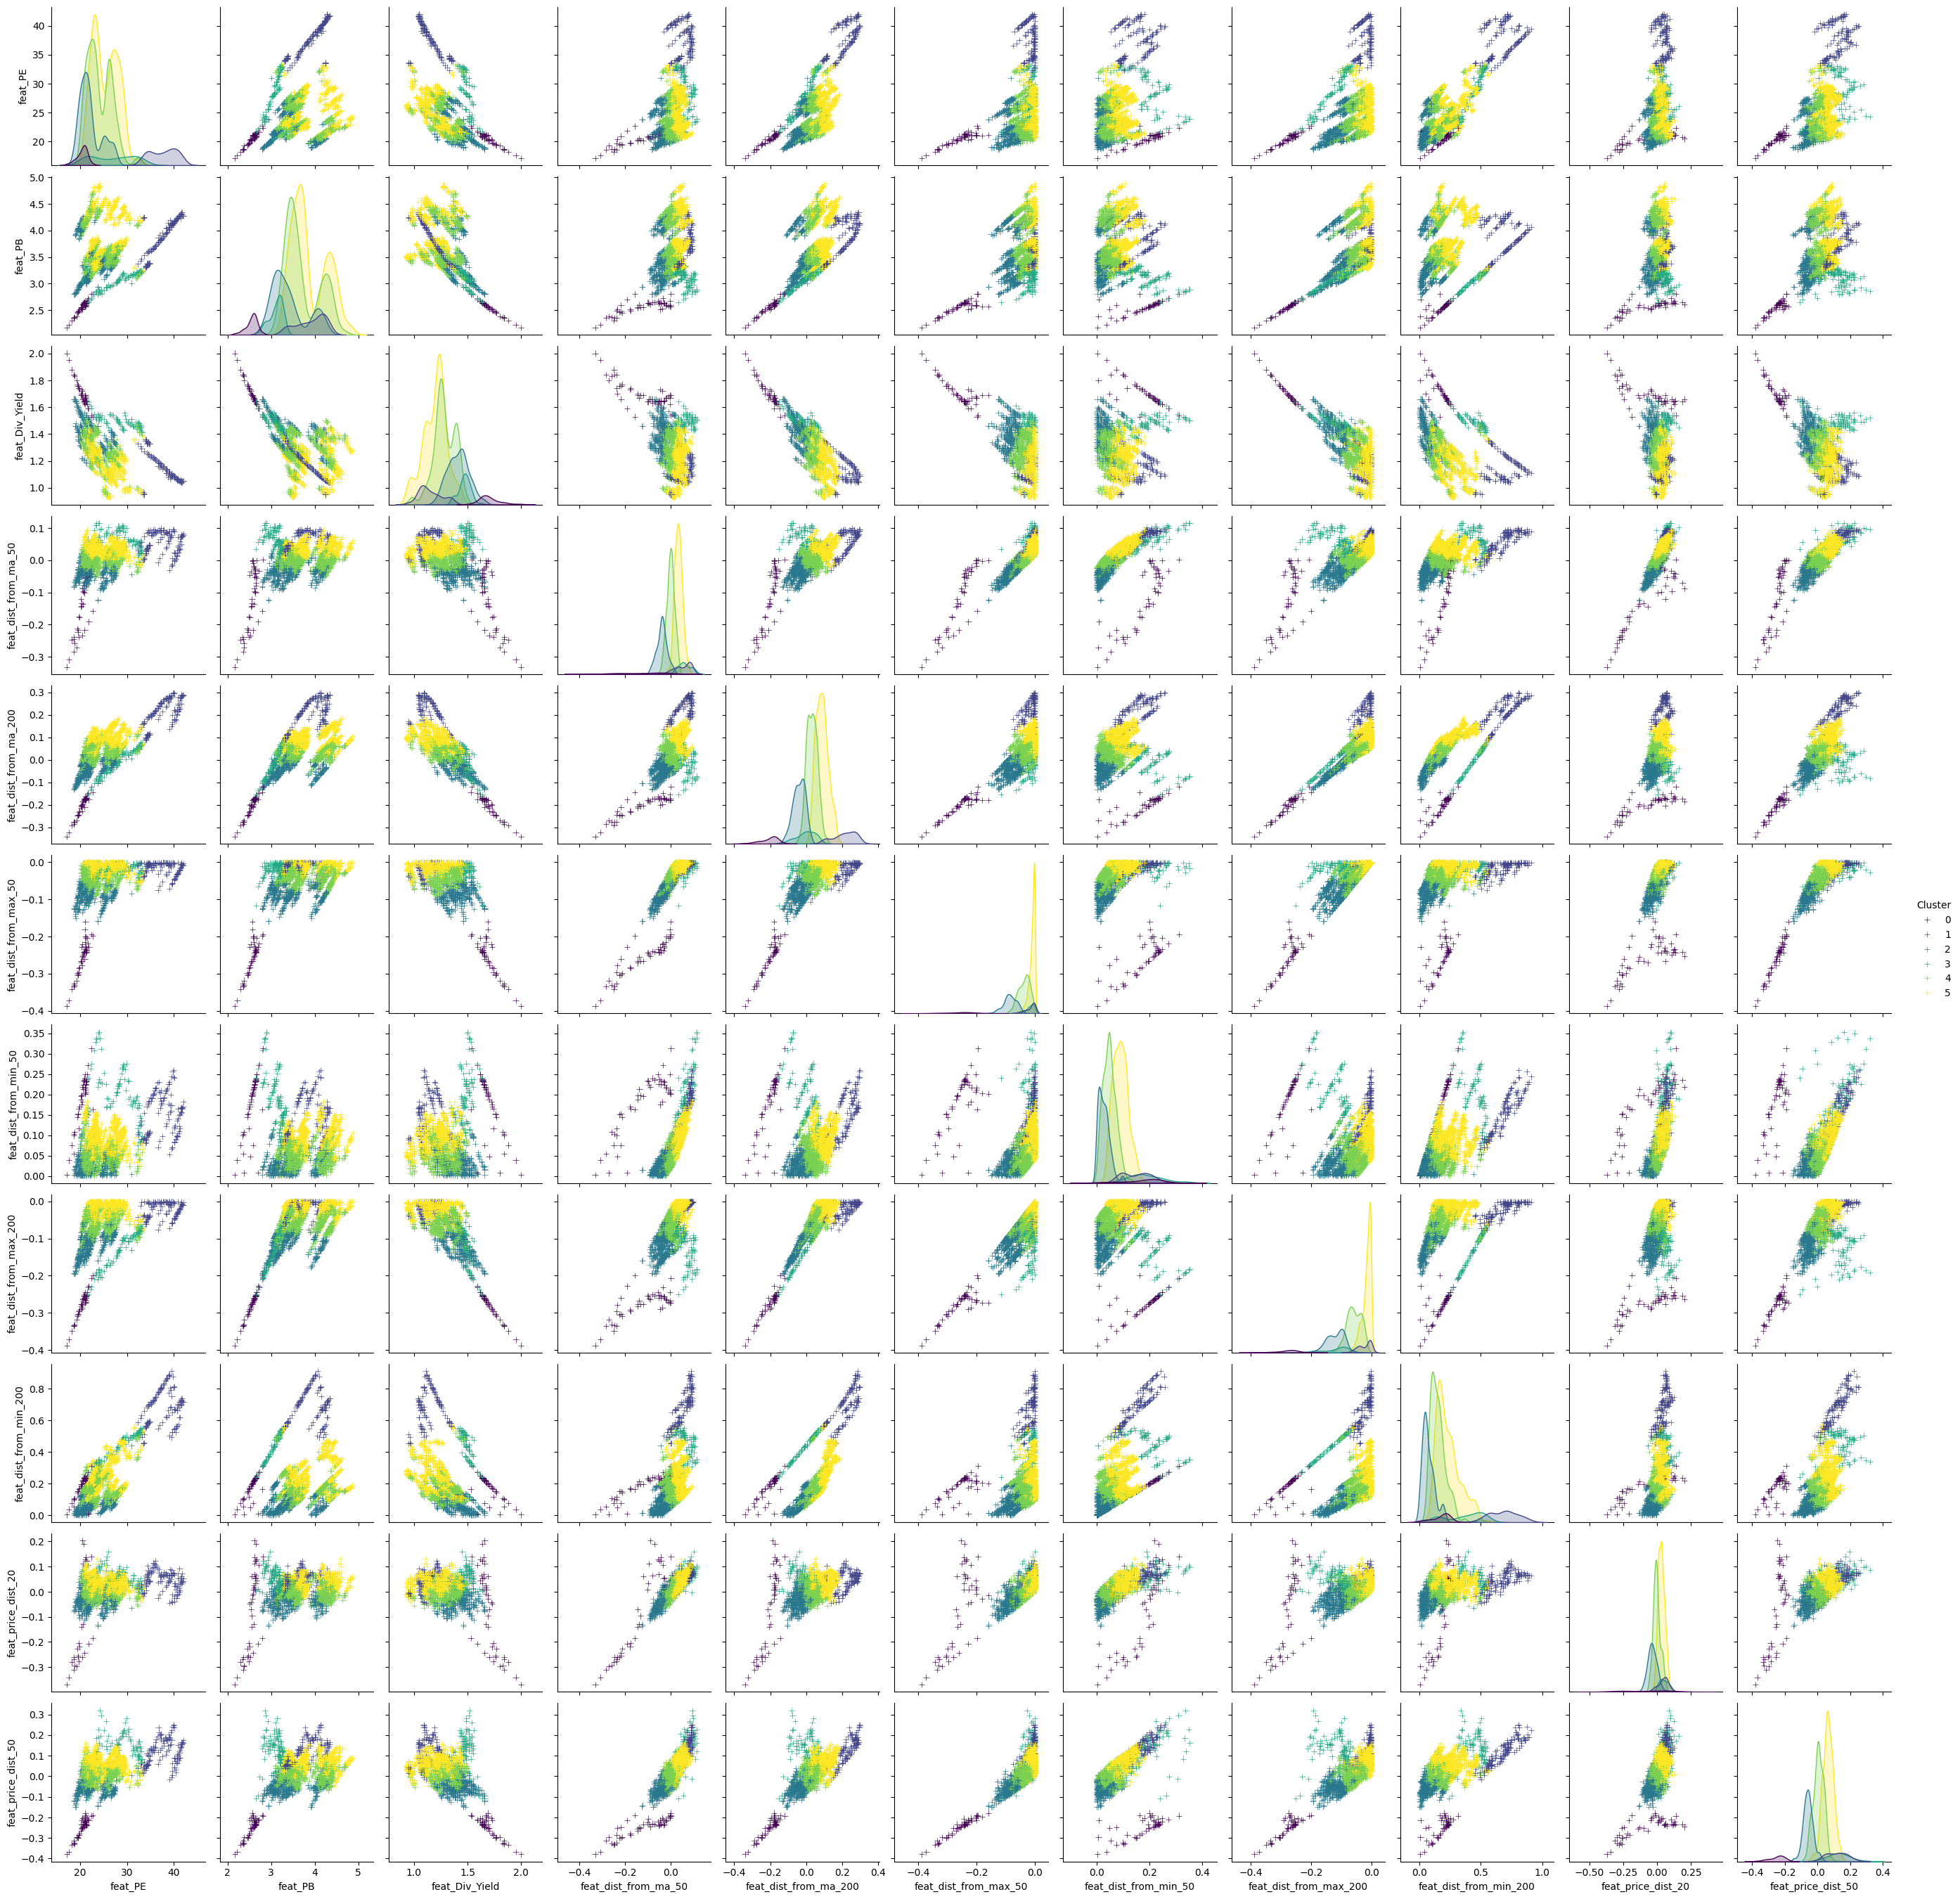

In [41]:
import seaborn as sns

sns.pairplot(data[features + ['Cluster']], diag_kind='kde', kind='scatter',
             markers='+', hue='Cluster', palette='viridis')
plt.show()


In [42]:
# Analyze and interpret clusters
for i in range(6):
    cluster_data = data[data['Cluster'] == i]
    print(f"Cluster {i}:\n", cluster_data[features].mean())


Cluster 0:
 feat_PE                   20.375417
feat_PB                    2.551250
feat_Div_Yield             1.701667
feat_dist_from_ma_50      -0.123591
feat_dist_from_ma_200     -0.206564
feat_dist_from_max_50     -0.258469
feat_dist_from_min_50      0.174333
feat_dist_from_max_200    -0.278481
feat_dist_from_min_200     0.174333
feat_price_dist_20        -0.075743
feat_price_dist_50        -0.250242
dtype: float64
Cluster 1:
 feat_PE                   37.687541
feat_PB                    3.910820
feat_Div_Yield             1.153443
feat_dist_from_ma_50       0.054762
feat_dist_from_ma_200      0.211950
feat_dist_from_max_50     -0.017230
feat_dist_from_min_50      0.151009
feat_dist_from_max_200    -0.022520
feat_dist_from_min_200     0.683441
feat_price_dist_20         0.044984
feat_price_dist_50         0.117324
dtype: float64
Cluster 2:
 feat_PE                   22.142853
feat_PB                    3.405288
feat_Div_Yield             1.412435
feat_dist_from_ma_50      -0.03804

In [43]:
data_s=data

In [44]:
data_s.reset_index(inplace=True)

In [45]:
import plotly.express as px



fig = px.scatter(
    data_s,
    x='Date',
    y='Close',
    color='Cluster',
    color_continuous_scale='rdylgn',
    title='Cluster Analysis - Training',
)

# Customize the axis labels
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Close')

# Show the plot
fig.show()


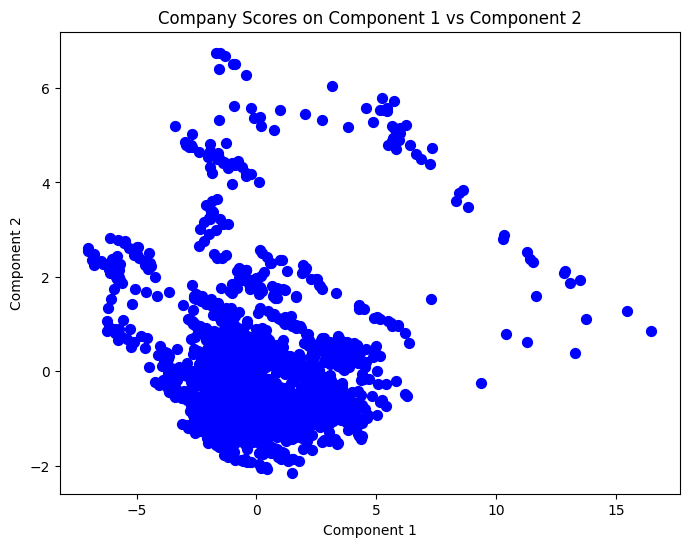

In [46]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = data[features]

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create PCA object with 3 components
pca = PCA(n_components=3)

# Fit and transform the data
principal_components = pca.fit_transform(X_scaled)

# Create DataFrame to hold results
df_pca = pd.DataFrame(data=principal_components,
                      columns=['PC1', 'PC2', 'PC3'])

# Scatter plot of PC1 vs PC2
plt.figure(figsize=(8,6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c='blue', s=50)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Company Scores on Component 1 vs Component 2')
plt.show()


In [47]:
# View the 'loadings' to understand how original ratios contribute to components
print(pca.components_)




[[-0.25451742 -0.20080939  0.27553133 -0.35957273 -0.37046038 -0.34714198
  -0.18105302 -0.33591756 -0.27289003 -0.29291769 -0.35503158]
 [ 0.08303894 -0.37482439  0.38474519  0.2105773  -0.17556457 -0.09321514
   0.60268399 -0.33766066  0.23584705  0.27147312  0.11900997]
 [ 0.57229557 -0.04881916 -0.19014528 -0.28469853  0.20524428 -0.33769372
   0.02427291 -0.12914444  0.50347549 -0.32992749 -0.1308302 ]]


In [48]:
# Calculate explained variance to see importance of each component
print(pca.explained_variance_ratio_)

[0.5531941  0.16187152 0.12036731]


<ipython-input-49-0ff9bf687407>:11: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



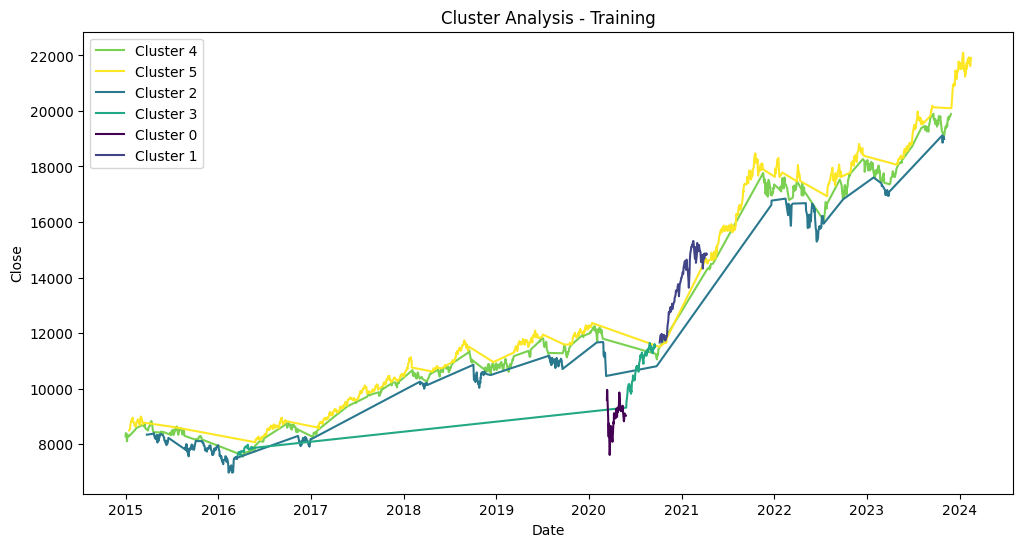

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm  # For the 'viridis' colormap

# ... (Assume your data_s DataFrame exists with 'Date', 'Close', 'Cluster')

# Extract unique clusters in order for sequential coloring
unique_clusters = data_s['Cluster'].unique()

# Get 'viridis' colormap and normalize
cmap = cm.get_cmap('viridis')
normalize = plt.Normalize(vmin=unique_clusters.min(), vmax=unique_clusters.max())

fig, ax = plt.subplots(figsize=(12, 6))

# Scatter plot with colors from colormap
for i, cluster in enumerate(unique_clusters):
    cluster_data = data_s[data_s['Cluster'] == cluster]
    ax.plot(cluster_data['Date'], cluster_data['Close'],
               c=cmap(normalize(cluster)),
               label=f'Cluster {cluster}')

# Labels and aesthetics
ax.set_xlabel('Date')
ax.set_ylabel('Close')
ax.set_title('Cluster Analysis - Training')
ax.legend()
plt.show()


<ipython-input-50-a51a2da2b58a>:1: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



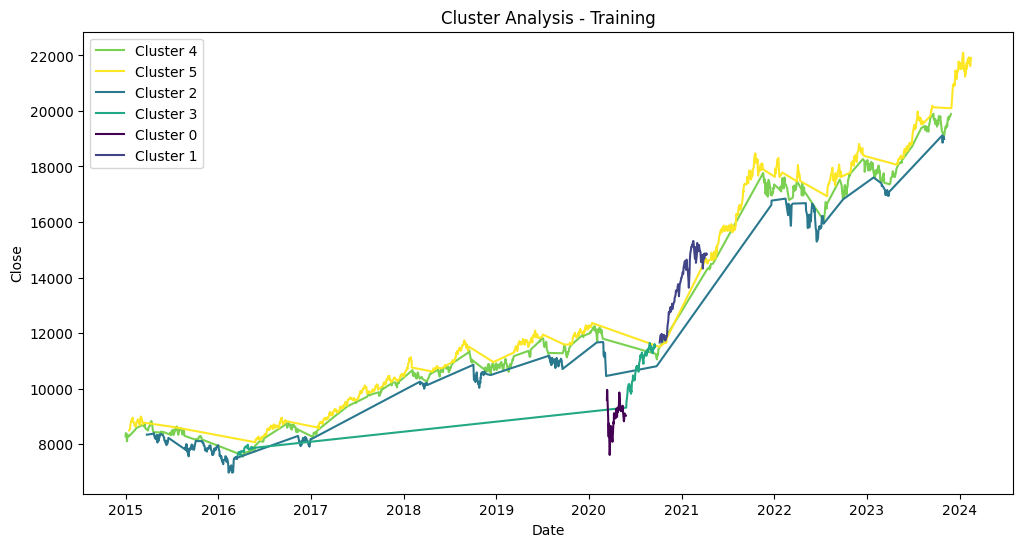

In [50]:
cmap = cm.get_cmap('viridis')
normalize = plt.Normalize(vmin=unique_clusters.min(), vmax=unique_clusters.max())

fig, ax = plt.subplots(figsize=(12, 6))
# Line plot for each cluster
for i, cluster in enumerate(unique_clusters):
   cluster_data = data_s[data_s['Cluster'] == cluster]
   ax.plot(cluster_data['Date'], cluster_data['Close'],
           c=cmap(normalize(cluster)),
           label=f'Cluster {cluster}')
# Labels and aesthetics
ax.set_xlabel('Date')
ax.set_ylabel('Close')
ax.set_title('Cluster Analysis - Training')
ax.legend()
plt.show()

<Axes: >

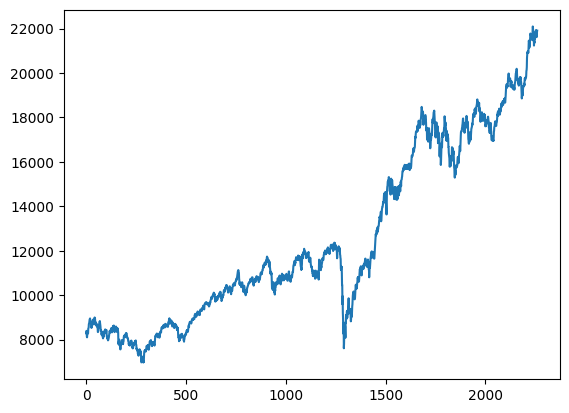

In [51]:
data_s['Close'].plot()